<a href="https://colab.research.google.com/github/Suriyablue/Dataset/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install Text-Text

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 🔧 Installing Required Text-to-Speech Library
We install the `TTS` library (by coqui.ai), which is used for text-to-speech conversion.


In [ ]:
# Installing the Coqui TTS library for speech synthesis
!pip install TTS

## 🔧 Installing Resemblyzer for Voice Embeddings
We install `resemblyzer`, a library used for extracting speaker embeddings from audio. This is useful for speaker verification or voice cloning.


In [ ]:
# Installing Resemblyzer library to extract speaker embeddings
!pip install resemblyzer


## 🔧 Installing Additional Audio Processing Libraries
We install key libraries for audio preprocessing and transcription, including `faster-whisper`, `pydub`, `librosa`, and `soundfile`.



In [ ]:
# Installing whisper-based ASR (Automatic Speech Recognition) and audio processing tools
!pip install faster-whisper pydub librosa soundfile --quiet  # --quiet reduces console output

## 🎵 Audio Preprocessing: Convert to Mono and Resample
We load the input audio file, convert it to mono, resample it to 22050 Hz, and save the preprocessed output.



In [2]:
import librosa
import soundfile as sf

# Define file paths
input_path = "/content/drive/MyDrive/AudioFiles/uml diagrams using chatgot_082553-enhanced-v2.wav"
output_path = "/content/drive/MyDrive/AudioFiles/output.wav"

# Load the audio: convert to mono and resample to 22050 Hz
wav, sr = librosa.load(input_path, sr=22050, mono=True)

# Save the preprocessed audio to a new file
sf.write(output_path, wav, 22050)

print(f"✔ Preprocessed audio saved to: {output_path}")

✔ Preprocessed audio saved to: /content/drive/MyDrive/AudioFiles/output.wav


## 🧠 Extracting Speaker Embedding using Resemblyzer
We use `Resemblyzer` to extract a speaker embedding (also called a d-vector) from the preprocessed audio. This embedding represents the unique vocal features of the speaker.


In [3]:
from resemblyzer import VoiceEncoder, preprocess_wav
import numpy as np

# Initialize the voice encoder
encoder = VoiceEncoder()

# Preprocess the audio file for embedding extraction
wav_pre = preprocess_wav(output_path)

# Extract speaker embedding (d-vector)
embed = encoder.embed_utterance(wav_pre)

print("✔ Speaker embedding extracted. Shape:", embed.shape)

# Save the embedding as a .npy file for future use
np.save("/content/drive/MyDrive/AudioFiles/embeddings.npy", embed)


Loaded the voice encoder model on cuda in 0.21 seconds.
✔ Speaker embedding extracted. Shape: (256,)


## 🗣️ Voice Cloning with Pre-trained Multilingual TTS Model
We use the Coqui TTS library to generate speech from text, mimicking the voice characteristics of a reference speaker using the extracted embedding.


In [ ]:
from TTS.api import TTS

# Load a pre-trained multilingual TTS model capable of voice cloning
tts = TTS(model_name="tts_models/multilingual/multi-dataset/your_tts", progress_bar=False, gpu=False)

# Define the text to synthesize
text = "Hello Every one welcome to MG squad naa thaa unga madan"
output_audio = "cloned.wav"

# Generate cloned speech using the reference audio and speaker embedding
tts.tts_to_file(
    text=text,
    speaker_wav=output_path,           # Reference audio (used for voice cloning)
    file_path=output_audio,            # Output path for cloned audio
    language='en',                     # Language code
    speaker_embedding=embed            # Speaker embedding vector
)

print(f"✔ Cloned voice saved to: {output_audio}")


## ▶️ Play and Download the Cloned Audio
We play the generated cloned audio within the notebook and also provide a download link to save it locally.


In [5]:
from IPython.display import Audio, FileLink

# Play the cloned audio
Audio("cloned.wav")

# Provide a download link to manually download the file
FileLink("cloned.wav")


/content/cloned.wav

## 🧾 Transcribing Audio Using Faster-Whisper
We use the `faster-whisper` ASR model to transcribe the input audio into text. The transcription is done segment-wise and then combined into a single string.



In [ ]:
from faster_whisper import WhisperModel

# Load Whisper model
model = WhisperModel("small", compute_type="auto")  # use 'medium' or 'small' if needed

# Transcribe with forced language as English
segments, _ = model.transcribe(
    "/content/drive/MyDrive/AudioFiles/Vijay-Mallya-UGLY-TRUTH-Madan-Go.wav",
    language="en"  #Force the model to interpret speech as English
)

# Combine all segments into one text
transcribed_text = " ".join([seg.text for seg in segments])
print("📝 Transcribed Text:\n", transcribed_text)


/tmp/ipython-input-2555028051.py:36: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2555028051.py:36: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128483 (\N{SPEAKING HEAD IN SILHOUETTE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


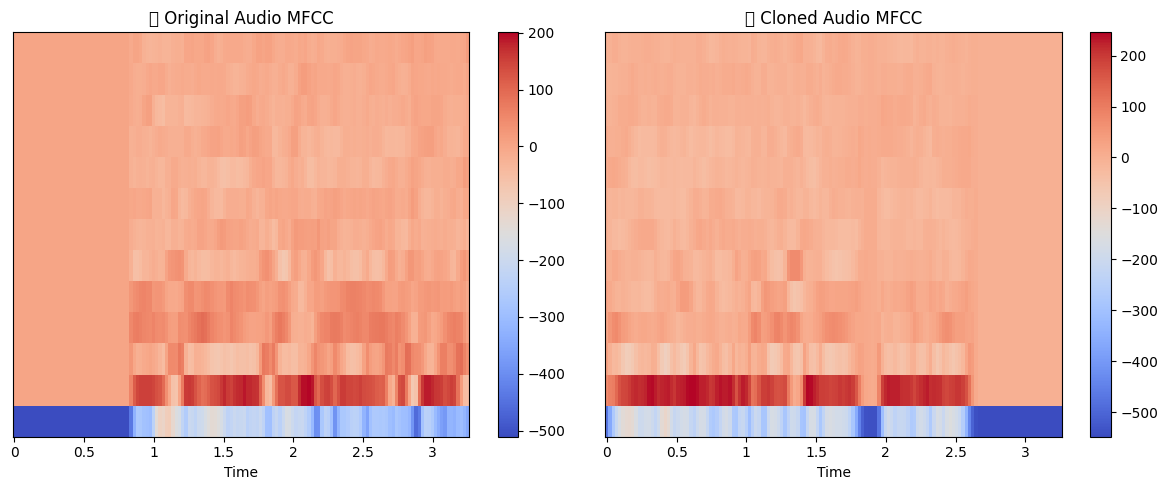

✅ Similarity Score (0 to 1): 0.98


In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Load original and cloned audio
orig_audio_path = "/content/drive/MyDrive/AudioFiles/uml diagrams using chatgot_082553-enhanced-v2.wav"
cloned_audio_path = "cloned.wav"

orig_audio, sr_orig = librosa.load(orig_audio_path, sr=22050)
cloned_audio, sr_clone = librosa.load(cloned_audio_path, sr=22050)

# Trim to same length (based on the shorter audio)
min_len = min(len(orig_audio), len(cloned_audio))
orig_audio = orig_audio[:min_len]
cloned_audio = cloned_audio[:min_len]

# Compute MFCCs
mfcc_orig = librosa.feature.mfcc(y=orig_audio, sr=22050, n_mfcc=13)
mfcc_clone = librosa.feature.mfcc(y=cloned_audio, sr=22050, n_mfcc=13)

# Plot MFCCs side-by-side
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
librosa.display.specshow(mfcc_orig, sr=22050, x_axis='time')
plt.colorbar()
plt.title("🎤 Original Audio MFCC")

plt.subplot(1, 2, 2)
librosa.display.specshow(mfcc_clone, sr=22050, x_axis='time')
plt.colorbar()
plt.title("🗣️ Cloned Audio MFCC")

plt.tight_layout()
plt.show()

# Cosine similarity between mean MFCCs
sim_score = cosine_similarity(
    [np.mean(mfcc_orig, axis=1)],
    [np.mean(mfcc_clone, axis=1)]
)[0][0]

print(f"✅ Similarity Score (0 to 1): {sim_score:.2f}")


Could not strip 'Untitled6.ipynb': file not found
